# Part 1: Data Cleaning

Author: `Arushi Bhandari`

The dataset used to obtain these tweets, "Farmers Protest Tweets Dataset (CSV)", was published by Pratham Sharma on Kaggle. The latest version (updated 21-11-2021) contains ~1,000,000 tweets tweeted since November 1, 2020 until November 21, 2021, by ~170,000 Twitter users.

Link: https://www.kaggle.com/prathamsharma123/farmers-protest-tweets-dataset-csv

In [1]:
# importing required packages
import pandas as pd
from datetime import datetime
from collections import Counter

### Obtaining Past Tweets

In this section, I obtain `15368 tweets` with the hashtag '#FarmersProtest' that were tweeted on `January 26, 2021` , India's Republic Day,' when the protests were in full swing. I began by exploring the original dataset.

In [2]:
pastTweets = pd.read_csv("archive/tweets.csv", engine = "python", error_bad_lines = False)

In [3]:
pastTweets.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ShashiRajbhar6/status/1376...,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,1.376739e+18,1.015970e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
1,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN
2,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN
3,https://twitter.com/SukhdevSingh_/status/13767...,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,1.376739e+18,1.308357e+18,0,1,3,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
4,https://twitter.com/Davidmu66668113/status/137...,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the...",1.376739e+18,1.357312e+18,0,0,1,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN


In [4]:
len(pastTweets)

1084452

There are `1084452 tweets` in the original dataset. I removed the columns that I deemed unnecessary for my analysis.

In [5]:
past = pastTweets.drop(columns = ['tweetId', 'quoteCount', 'retweetedTweet', 'quotedTweet', 'mentionedUsers'])

In [6]:
past.head()

,tweetUrl,date,renderedContent,userId,replyCount,retweetCount,likeCount,source,media
0,https://twitter.com/ShashiRajbhar6/status/1376...,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,1.015970e+18,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN
1,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,1.332937e+18,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...
2,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,1.332937e+18,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...
3,https://twitter.com/SukhdevSingh_/status/13767...,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,1.308357e+18,0,1,3,"<a href=""http://twitter.com/download/android"" ...",NaN
4,https://twitter.com/Davidmu66668113/status/137...,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the...",1.357312e+18,0,0,1,"<a href=""http://twitter.com/download/android"" ...",NaN


To find the tweets tweeted on `January 26, 2021`, I filtered the dataset.

In [7]:
# checking type of "date" column
datesDF = pd.DataFrame(past, columns = ['date'])
check = datesDF.dtypes
print(check)

date    object
dtype: object


Since the date was stored as an object, I converted it to a `datetime` object.

In [8]:
past['datetime'] = pd.to_datetime(past['date'])

In [9]:
past.tail()

,tweetUrl,date,renderedContent,userId,replyCount,retweetCount,likeCount,source,media,datetime
1084447,https://twitter.com/drkumarpmch2000/status/144...,2021-09-30 00:48:05+00:00,Good morning friends 🌹\n#FarmersProtest,3.035365e+09,1,1,1,"<a href=""http://twitter.com/download/android"" ...",NaN,2021-09-30 00:48:05+00:00
1084448,https://twitter.com/DigitalKisanBot/status/144...,2021-09-30 00:28:06+00:00,There is no compromise when it comes to injust...,1.309303e+18,0,0,1,"<a href=""https://help.twitter.com/en/using-twi...",NaN,2021-09-30 00:28:06+00:00
1084449,https://twitter.com/sandhumannu0476/status/144...,2021-09-30 00:22:20+00:00,@KhalsaAid_AU @Khalsa_Aid ਮਾਨਸ ਕੀ ਜਾਤ ਸਭੈ ਏਕੈ ...,1.377187e+18,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,2021-09-30 00:22:20+00:00
1084450,https://twitter.com/mani262002/status/14433695...,2021-09-30 00:18:06+00:00,#FarmersProtest_StandsStrong \n#FarmersProtest...,2.350986e+09,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,2021-09-30 00:18:06+00:00
1084451,https://twitter.com/sandhumannu0476/status/144...,2021-09-30 00:13:02+00:00,Good morning friends... \n#FarmersProtest http...,1.377187e+18,0,0,0,"<a href=""http://twitter.com/download/android"" ...","[{'_type': 'snscrape.modules.twitter.Photo', '...",2021-09-30 00:13:02+00:00


I then converted it into a string for filtering.

In [10]:
dtToStr = lambda x: x.strftime("%Y-%m-%d") 

In [11]:
past['onlyDate'] = past["datetime"].apply(dtToStr)
past.head()

,tweetUrl,date,renderedContent,userId,replyCount,retweetCount,likeCount,source,media,datetime,onlyDate
0,https://twitter.com/ShashiRajbhar6/status/1376...,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,1.015970e+18,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,2021-03-30 03:33:46+00:00,2021-03-30
1,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,1.332937e+18,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,2021-03-30 03:33:23+00:00,2021-03-30
2,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,1.332937e+18,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,2021-03-30 03:31:00+00:00,2021-03-30
3,https://twitter.com/SukhdevSingh_/status/13767...,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,1.308357e+18,0,1,3,"<a href=""http://twitter.com/download/android"" ...",NaN,2021-03-30 03:30:45+00:00,2021-03-30
4,https://twitter.com/Davidmu66668113/status/137...,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the...",1.357312e+18,0,0,1,"<a href=""http://twitter.com/download/android"" ...",NaN,2021-03-30 03:30:30+00:00,2021-03-30


In [12]:
jan26 = past[past['onlyDate'] == "2021-01-26"]

In [13]:
jan26 = jan26.reset_index()
jan26 = jan26.drop(columns = ['index', 'datetime'])

In [14]:
jan26.head()
len(jan26)

15368

This dataframe has `15368 tweets` and is stored in a csv file for further use.

In [15]:
jan26.to_csv('jan26tweets.csv', encoding='utf-8')

### Merging Tweets to Users

In this section, I merge the tweets obtained with the hashtag '#FarmersProtest' that were tweeted on `January 26, 2021` with the users that tweeted it using `userId`. I first import the two datasets as dataframes.

In [16]:
jan26 = pd.read_csv("jan26tweets.csv", index_col=0)

In [17]:
users = pd.read_csv("archive/users.csv")

I explore the two dataframes and remove NA values.

In [18]:
jan26 = jan26[jan26['renderedContent'] != 'NaN']
jan26.head()

,tweetUrl,date,renderedContent,userId,replyCount,retweetCount,likeCount,source,media,onlyDate
0,https://twitter.com/kreigerSJWjedi/status/1354...,2021-01-26 23:59:41+00:00,Sikhs have hoisted Nishan Sahib at laal qila 1...,1.150830e+18,0,1,1,"<a href=""http://twitter.com/download/android"" ...",NaN,2021-01-26
1,https://twitter.com/Amritpa13240964/status/135...,2021-01-26 23:59:36+00:00,Abb bolo ...... jo bhot vdde bhagat bn te hain...,1.205530e+18,0,0,3,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,2021-01-26
2,https://twitter.com/PSGrewal2/status/135421733...,2021-01-26 23:59:06+00:00,@amaanbali Pray for their recovery 🙏🏼\n\n#Farm...,1.576671e+09,0,0,1,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,2021-01-26
3,https://twitter.com/MarsCheetah/status/1354217...,2021-01-26 23:59:03+00:00,Thousands of farmers protesting at agriculture...,1.141550e+18,3,7,20,"<a href=""http://twitter.com/download/iphone"" r...",[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,2021-01-26
4,https://twitter.com/DessieAussie/status/135421...,2021-01-26 23:58:38+00:00,Rajdeep sardesai regularly spread fake news th...,1.379751e+08,0,1,0,"<a href=""http://twitter.com/download/android"" ...",NaN,2021-01-26


In [19]:
users.head()

,username,displayname,userId,rawDescription,descriptionUrls,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,linkUrl,profileImageUrl,profileBannerUrl,profileUrl
0,ShashiRajbhar6,Shashi Rajbhar,1.020000e+18,Satya presan 🤔ho Sakta but prajit💪 nhi\njhuth ...,[],False,2018-07-08T14:44:03+00:00,1788,1576,14396,26071,1,254,"Azm Uttar Pradesh, India",False,NaN,https://pbs.twimg.com/profile_images/135433129...,https://pbs.twimg.com/profile_banners/10159697...,https://twitter.com/ShashiRajbhar6
1,kaursuk06272818,KAUR SUKH🌾ਕੌਰ ਸੁਖ,1.330000e+18,ਜਿਓਣਾ ਕੀ ਸਰੀਰਾਂ ਦਾ ਜੇਕਰ ਹੋਣ ਜ਼ਮੀਰਾਂ ਮਰੀਆਂ 🌼,[],False,2020-11-29T06:40:06+00:00,51,68,1338,3676,0,607,NaN,False,NaN,https://pbs.twimg.com/profile_images/133295149...,https://pbs.twimg.com/profile_banners/13329372...,https://twitter.com/kaursuk06272818
2,SukhdevSingh_,Sukhdev Singh,1.310000e+18,Just a part of my society . Social and Politic...,[],False,2020-09-22T10:45:27+00:00,2595,3314,3281,3533,0,519,"Punjab, India",False,NaN,https://pbs.twimg.com/profile_images/130835702...,https://pbs.twimg.com/profile_banners/13083566...,https://twitter.com/SukhdevSingh_
3,Davidmu66668113,tera jija 🤨🚩🇺🇸,1.360000e+18,dream boy 🌪🌍🔥💯,[],False,2021-02-04T12:55:36+00:00,18,286,347,520,0,3,NaN,False,NaN,https://pbs.twimg.com/profile_images/137600703...,https://pbs.twimg.com/profile_banners/13573117...,https://twitter.com/Davidmu66668113
4,Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,2.918611e+09,Seeker...,[],False,2014-12-04T13:29:54+00:00,173,41,8954,16364,19,112,"Jaipur,Rajasthan,India",False,NaN,https://pbs.twimg.com/profile_images/125684524...,https://pbs.twimg.com/profile_banners/29186109...,https://twitter.com/Abhimanyu_1987


In [20]:
users['verified'].value_counts()

False    231275
True       4385
Name: verified, dtype: int64

I merge the two dataframes on `userId`.

In [21]:
merged = jan26.merge(users, on = "userId")
merged

,tweetUrl,date,renderedContent,userId,replyCount,retweetCount,likeCount,source,media,onlyDate,...,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,linkUrl,profileImageUrl,profileBannerUrl,profileUrl
0,https://twitter.com/PSGrewal2/status/135421733...,2021-01-26 23:59:06+00:00,@amaanbali Pray for their recovery 🙏🏼\n\n#Farm...,1.576671e+09,0,0,1,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,2021-01-26,...,17436,46037,3,2132,"Brampton, Ontario",False,https://farmerprotests.carrd.co/,https://pbs.twimg.com/profile_images/127494003...,https://pbs.twimg.com/profile_banners/15766713...,https://twitter.com/PSGrewal2
1,https://twitter.com/PSGrewal2/status/135421733...,2021-01-26 23:59:06+00:00,@amaanbali Pray for their recovery 🙏🏼\n\n#Farm...,1.576671e+09,0,0,1,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,2021-01-26,...,17608,47311,3,2170,"Brampton, Ontario",False,https://farmerprotests.carrd.co/,https://pbs.twimg.com/profile_images/127494003...,https://pbs.twimg.com/profile_banners/15766713...,https://twitter.com/PSGrewal2
2,https://twitter.com/PSGrewal2/status/135421733...,2021-01-26 23:59:06+00:00,@amaanbali Pray for their recovery 🙏🏼\n\n#Farm...,1.576671e+09,0,0,1,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,2021-01-26,...,18358,51979,3,2299,"Brampton, Ontario",False,NaN,https://pbs.twimg.com/profile_images/127494003...,https://pbs.twimg.com/profile_banners/15766713...,https://twitter.com/PSGrewal2
3,https://twitter.com/PSGrewal2/status/135421733...,2021-01-26 23:59:06+00:00,@amaanbali Pray for their recovery 🙏🏼\n\n#Farm...,1.576671e+09,0,0,1,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,2021-01-26,...,19791,57554,3,2382,"Brampton, Ontario",False,NaN,https://pbs.twimg.com/profile_images/127494003...,https://pbs.twimg.com/profile_banners/15766713...,https://twitter.com/PSGrewal2
4,https://twitter.com/PSGrewal2/status/135421733...,2021-01-26 23:59:06+00:00,@amaanbali Pray for their recovery 🙏🏼\n\n#Farm...,1.576671e+09,0,0,1,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,2021-01-26,...,19791,57554,3,2382,"Brampton, Ontario",False,NaN,https://pbs.twimg.com/profile_images/127494003...,https://pbs.twimg.com/profile_banners/15766713...,https://twitter.com/PSGrewal2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141368,https://twitter.com/A_W_M_B/status/13538564606...,2021-01-26 00:05:08+00:00,This 👇🏽👇🏽👇🏽🙌🏽🙌🏽🙌🏽🙌🏽\n\n#kisaanektazindabaad #i...,2.471497e+09,0,2,9,"<a href=""http://twitter.com/download/iphone"" r...",NaN,2021-01-26,...,32672,25952,132,2513,Everywhere,False,https://linktr.ee/a.w.m.b,https://pbs.twimg.com/profile_images/145019165...,https://pbs.twimg.com/profile_banners/24714970...,https://twitter.com/A_W_M_B
141369,https://twitter.com/Jassisidhu/status/13538557...,2021-01-26 00:02:30+00:00,Today the farmers of punjab &amp; show the wor...,2.103003e+07,2,6,45,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,2021-01-26,...,55263,7126,160,2797,Birmingham UK & worldwide,False,http://www.instagram.com/jassisidhu,https://pbs.twimg.com/profile_images/127656989...,https://pbs.twimg.com/profile_banners/21030033...,https://twitter.com/Jassisidhu
141370,https://twitter.com/Jassisidhu/status/13538557...,2021-01-26 00:02:30+00:00,Today the farmers of punjab &amp; show the wor...,2.103003e+07,2,6,45,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,2021-01-26,...,55324,7155,159,2802,Birmingham UK & worldwide,False,http://www.instagram.com/jassisidhu,https://pbs.twimg.com/profile_images/127656989...,https://pbs.twimg.com/profile_banners/21030033...,https://twitter.com/Jassisidhu
141371,https://twitter.com/RanveerSP/status/135385542...,2021-01-26 00:01:00+00:00,How are we suppose to sleep when our people ar...,2.455012e+08,0,40,164,"<a href=""http://twitter.com/download/android"" ...",NaN,2021-01-26,...,3520,

I dropped duplicate tweets by the same user and dropped columns that are not required for analysis.

In [22]:
merged = merged.drop_duplicates(subset=['tweetUrl'], keep='first')

In [24]:
merged = merged.reset_index()

In [25]:
clean = merged.drop(columns = ['index', 'date', 'replyCount', 'retweetCount', 'likeCount', 
                               'onlyDate', 'descriptionUrls', 'created', 'friendsCount', 
                               'statusesCount', 'favouritesCount',  'listedCount', 
                               'mediaCount', 'linkUrl', 'profileImageUrl', 'profileBannerUrl'])

In [26]:
len(clean)
clean.head()

,level_0,tweetUrl,renderedContent,userId,source,media,username,displayname,rawDescription,verified,followersCount,location,protected,profileUrl
0,0,https://twitter.com/PSGrewal2/status/135421733...,@amaanbali Pray for their recovery 🙏🏼\n\n#Farm...,1.576671e+09,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,PSGrewal2,P.S. Grewal,#WeTheNorth | #LeafsForever | #TFCLive,False,966,"Brampton, Ontario",False,https://twitter.com/PSGrewal2
1,1,https://twitter.com/PSGrewal2/status/135421126...,@HarvKudos What was he even thinking? 🤡\n\n#Fa...,1.576671e+09,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,PSGrewal2,P.S. Grewal,#WeTheNorth | #LeafsForever | #TFCLive,False,966,"Brampton, Ontario",False,https://twitter.com/PSGrewal2
2,2,https://twitter.com/PSGrewal2/status/135420534...,@RaviSinghKA You owned him #FarmersProtest htt...,1.576671e+09,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'thumbnailUrl': 'https://pbs.twimg.com/tweet...,PSGrewal2,P.S. Grewal,#WeTheNorth | #LeafsForever | #TFCLive,False,966,"Brampton, Ontario",False,https://twitter.com/PSGrewal2
3,3,https://twitter.com/PSGrewal2/status/135405595...,Look what's trending number 1 in Canada right ...,1.576671e+09,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,PSGrewal2,P.S. Grewal,#WeTheNorth | #LeafsForever | #TFCLive,False,966,"Brampton, Ontario",False,https://twitter.com/PSGrewal2
4,4,https://twitter.com/PSGrewal2/status/135401934...,@JaskaranSandhu_ Beautiful sight to see 🙏🏽\n\n...,1.576671e+09,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,PSGrewal2,P.S. Grewal,#WeTheNorth | #LeafsForever | #TFCLive,False,966,"Brampton, Ontario",False,https://twitter.com/PSGrewal2


There are `7914 tweets` on merging the tweets with users.

### Verified vs. Non-Verified Users

I looked at the distribution between verified and non-verified users.

In [27]:
clean.verified.value_counts()

False    6995
True      919
Name: verified, dtype: int64

There are `919 verified users` to `6995 non-verified users`. I plotted a pie chart to visualize the division.

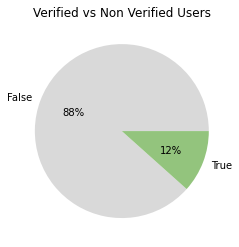

In [28]:
colours = ["#d9d9d9", "#93c47d"]
pieplot = clean.verified.value_counts().plot(kind='pie', title = "Verified vs Non Verified Users", label = "", colors = colours, autopct='%1.0f%%')
pieplot
fig = pieplot.get_figure()
fig.savefig("pieplot.png")

In [30]:
verified = clean[clean['verified'] == True]

In [31]:
verified.username.value_counts().head(20)

IndiaToday         116
ndtv                50
htTweets            41
TheDailyPioneer     34
NEWS9TWEETS         27
ndtvvideos          26
tv9gujarati         24
NewsMobileIndia     22
bsindia             22
thetribunechd       17
NewIndianXpress     16
dna                 16
BiIndia             15
Oneindia            14
firstpost           13
fpjindia            13
JagranEnglish       12
SandipGhose         12
the_hindu           11
MirrorNow           11
Name: username, dtype: int64

These are the top 20 verified users. They are generally news sources with `India Today` tweeting the most.

In [32]:
clean.to_csv('tweetswusers.csv', encoding='utf-8')